In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('covid_19_data.csv')

In [3]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
# Remving SNo
df.drop('SNo',axis=1,inplace=True)

In [5]:
df.isna().sum()

ObservationDate        0
Province/State     14899
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [6]:
df.dtypes

ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [7]:
df.drop('Province/State',axis=1,inplace=True)

In [8]:
df.columns

Index(['ObservationDate', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [9]:
df.ObservationDate=pd.to_datetime(df.ObservationDate)

In [10]:
df.dtypes

ObservationDate    datetime64[ns]
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [11]:
datewise=df.groupby('ObservationDate').agg({'Confirmed':sum,'Deaths':sum,'Recovered':sum})
datewise['days_since']=datewise.index-datewise.index.min()

In [12]:
print(f"Spread to countries : {len(df['Country/Region'].unique())}")
print(f"Totl cnfirmed cases : {datewise['Confirmed'][-1]}")
print(f"Totl Deaths cases : {datewise['Deaths'][-1]}")
print(f"Totl Recovered cases : {datewise['Recovered'][-1]}")

Spread to countries : 223
Totl cnfirmed cases : 5495061.0
Totl Deaths cases : 346232.0
Totl Recovered cases : 2231738.0


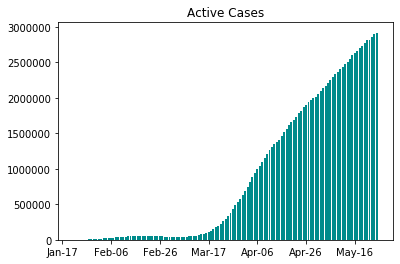

In [13]:
fig,ax=plt.subplots()
# Define the date format
date_form = mdates.DateFormatter("%b-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
ax.bar(x=datewise.index,height=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"],color='darkcyan');
ax.set_title('Active Cases');

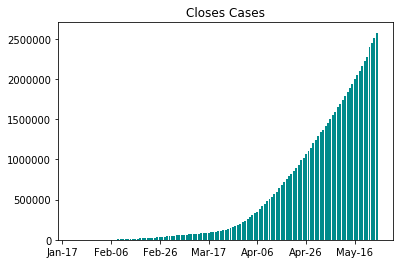

In [14]:
fig,ax=plt.subplots()
# Define the date format
date_form = mdates.DateFormatter("%b-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
ax.bar(x=datewise.index,height=datewise["Recovered"]+datewise["Deaths"],color='darkcyan');
ax.set_title('Closes Cases');

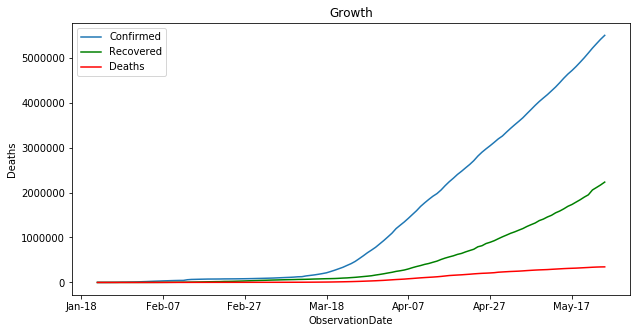

In [15]:
fig,ax=plt.subplots(figsize=(10,5))
dateform=mdates.DateFormatter("%b-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
ax.set_title('Growth')
sns.lineplot(x=datewise.index,y=datewise['Confirmed'])
sns.lineplot(x=datewise.index,y=datewise['Recovered'],color='green')
sns.lineplot(x=datewise.index,y=datewise['Deaths'],color='red')
ax.legend(['Confirmed','Recovered','Deaths']);

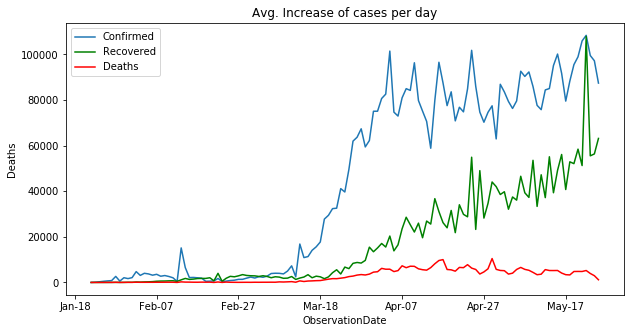

In [16]:
fig,ax=plt.subplots(figsize=(10,5))
dateform=mdates.DateFormatter("%b-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
ax.set_title('Avg. Increase of cases per day')
sns.lineplot(x=datewise.index,y=datewise['Confirmed'].diff().fillna(0))
sns.lineplot(x=datewise.index,y=datewise['Recovered'].diff().fillna(0),color='green')
sns.lineplot(x=datewise.index,y=datewise['Deaths'].diff().fillna(0),color='red')
ax.legend(['Confirmed','Recovered','Deaths']);

In [17]:
print(f"Avg increase in Daily Cases {datewise['Confirmed'].diff().fillna(0).mean()}" )
print(f"Avg increase in Daily Cases {datewise['Recovered'].diff().fillna(0).mean()}" )
print(f"Avg increase in Daily Cases {datewise['Deaths'].diff().fillna(0).mean()}" )

Avg increase in Daily Cases 43956.048
Avg increase in Daily Cases 17853.68
Avg increase in Daily Cases 2769.72


In [18]:
countrywise=df[df["ObservationDate"]==df["ObservationDate"].max()]\
.groupby('Country/Region').agg({'Confirmed':sum,'Deaths':sum,'Recovered':sum}).sort_values(by='Confirmed',ascending=False)

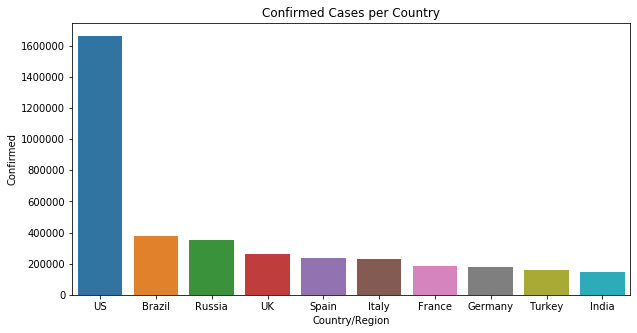

In [19]:
plt.figure(figsize=(10,5))
plt.title('Confirmed Cases per Country')
sns.barplot(countrywise.index[:10],countrywise['Confirmed'][:10]);

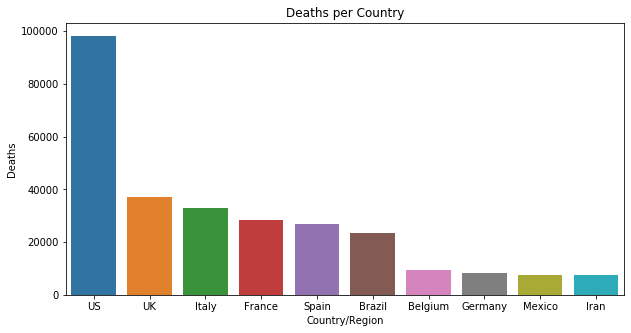

In [20]:
plt.figure(figsize=(10,5))
plt.title('Deaths per Country')
countrywise_deaths=countrywise.sort_values(by='Deaths',ascending=False)
sns.barplot(countrywise_deaths.index[:10],countrywise_deaths['Deaths'][:10]);

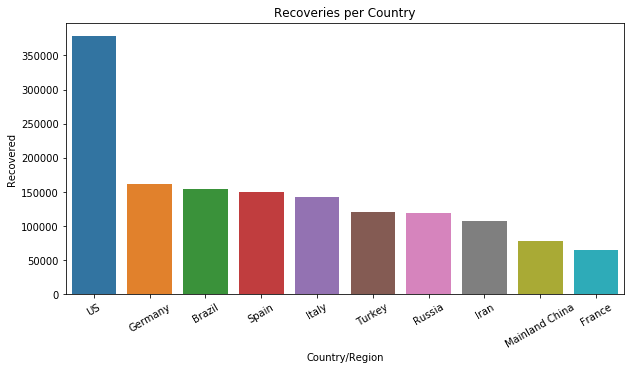

In [21]:
plt.figure(figsize=(10,5))
plt.title('Recoveries per Country')
countrywise_recs=countrywise.sort_values(by='Recovered',ascending=False)
sns.barplot(countrywise_recs.index[:10],countrywise_recs['Recovered'][:10])
plt.xticks(rotation=30);

In [22]:
#Comparison of China,US,Italy,India,Spain,brazil

china=df[df['Country/Region']=='Mainland China']
india=df[df['Country/Region']=='India']
us=df[df['Country/Region']=='US']
spain=df[df['Country/Region']=='Spain']
italy=df[df['Country/Region']=='Italy']
brazil=df[df['Country/Region']=='Brazil']
rest=df[(df['Country/Region']!='Mainland China')&(df['Country/Region']!='US')&(df['Country/Region']!='India')\
        &(df['Country/Region']!='Spain')&(df['Country/Region']!='Italy')&(df['Country/Region']!='Brazil')]

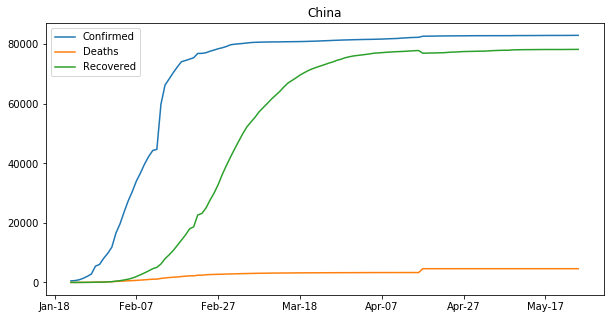

In [23]:
fig,ax=plt.subplots(figsize=(10,5))
dateform=mdates.DateFormatter("%b-%d")
ax.set_title('China')
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.plot(china.groupby('ObservationDate').agg({'Confirmed':sum,'Deaths':sum,'Recovered':sum}))
plt.legend(['Confirmed','Deaths','Recovered']);

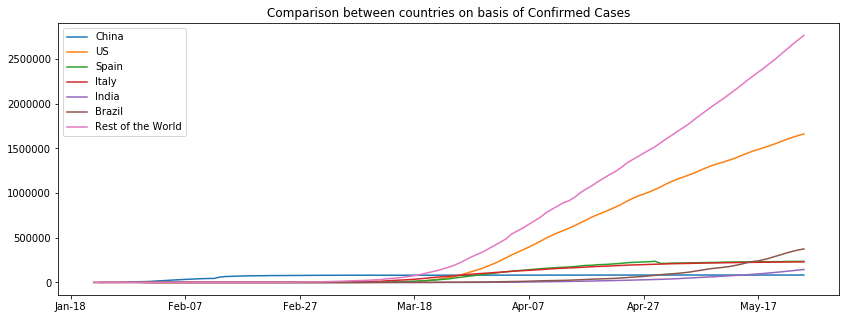

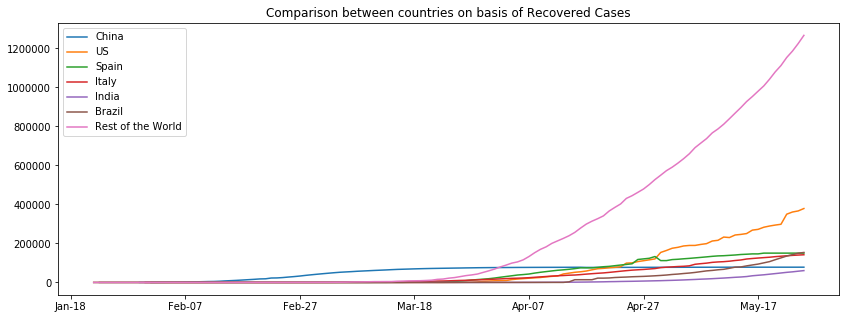

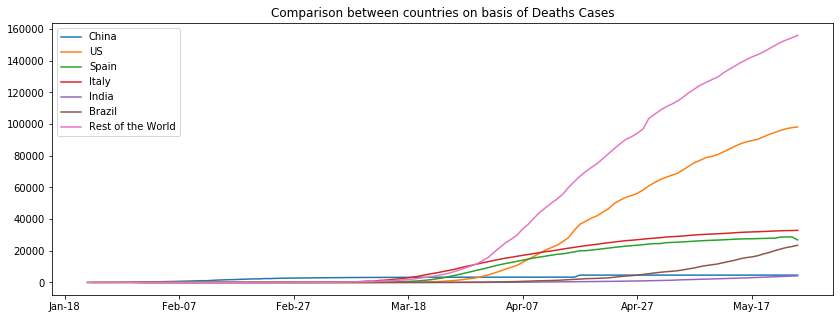

In [24]:
# Comparison between the Countries
for i in ['Confirmed','Recovered','Deaths']:

    fig,ax=plt.subplots(figsize=(14,5))

    dateform=mdates.DateFormatter("%b-%d")
    ax.set_title(f'Comparison between countries on basis of {i} Cases')
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
    plt.plot(china.groupby('ObservationDate').agg({'Confirmed':sum,'Deaths':sum,'Recovered':sum})[i],label='China');
    plt.plot(us.groupby('ObservationDate').agg({'Confirmed':sum,'Deaths':sum,'Recovered':sum})[i],label='US');
    plt.plot(spain.groupby('ObservationDate').agg({'Confirmed':sum,'Deaths':sum,'Recovered':sum})[i],label='Spain');
    plt.plot(italy.groupby('ObservationDate').agg({'Confirmed':sum,'Deaths':sum,'Recovered':sum})[i],label='Italy');
    plt.plot(india.groupby('ObservationDate').agg({'Confirmed':sum,'Deaths':sum,'Recovered':sum})[i],label='India');
    plt.plot(brazil.groupby('ObservationDate').agg({'Confirmed':sum,'Deaths':sum,'Recovered':sum})[i],label='Brazil');
    plt.plot(rest.groupby('ObservationDate').agg({'Confirmed':sum,'Deaths':sum,'Recovered':sum})[i],label='Rest of the World');
    plt.legend();

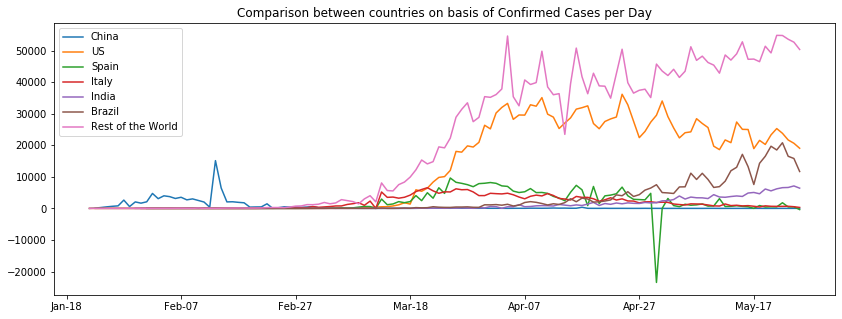

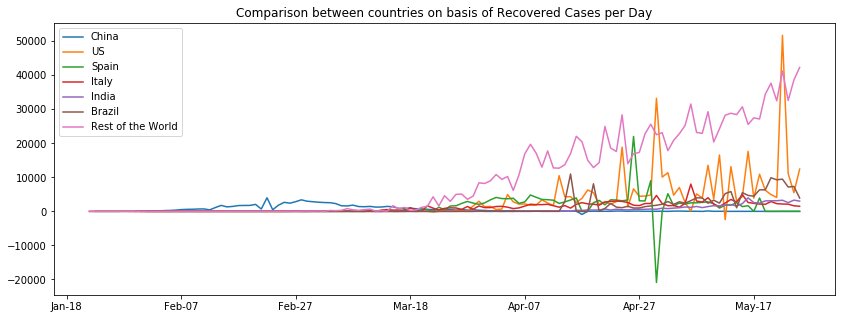

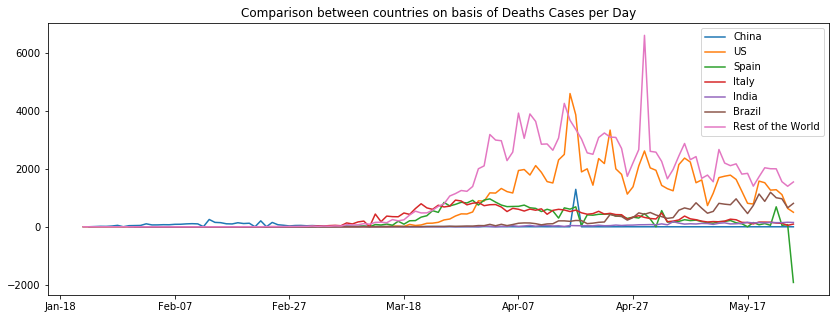

In [25]:
# Comparison between the Countries
for i in ['Confirmed','Recovered','Deaths']:

    fig,ax=plt.subplots(figsize=(14,5))

    dateform=mdates.DateFormatter("%b-%d")
    ax.set_title(f'Comparison between countries on basis of {i} Cases per Day')
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
    plt.plot(china.groupby('ObservationDate').agg({'Confirmed':sum,'Deaths':sum,'Recovered':sum})[i].diff().fillna(0),label='China');
    plt.plot(us.groupby('ObservationDate').agg({'Confirmed':sum,'Deaths':sum,'Recovered':sum})[i].diff().fillna(0),label='US');
    plt.plot(spain.groupby('ObservationDate').agg({'Confirmed':sum,'Deaths':sum,'Recovered':sum})[i].diff().fillna(0),label='Spain');
    plt.plot(italy.groupby('ObservationDate').agg({'Confirmed':sum,'Deaths':sum,'Recovered':sum})[i].diff().fillna(0),label='Italy');
    plt.plot(india.groupby('ObservationDate').agg({'Confirmed':sum,'Deaths':sum,'Recovered':sum})[i].diff().fillna(0),label='India');
    plt.plot(brazil.groupby('ObservationDate').agg({'Confirmed':sum,'Deaths':sum,'Recovered':sum})[i].diff().fillna(0),label='Brazil');
    plt.plot(rest.groupby('ObservationDate').agg({'Confirmed':sum,'Deaths':sum,'Recovered':sum})[i].diff().fillna(0),label='Rest of the World');
    plt.legend();

## MACHINE LEARNING

In [26]:
datewise["days_since"]=datewise.index-datewise.index[0]
datewise["days_since"]=datewise["days_since"].dt.days

In [27]:
#Using ML for predictions
model_scores=[]
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y=datewise.iloc[:,:]['Confirmed'].values.reshape(-1,1)
x=datewise.iloc[:,:]['days_since'].values.reshape(-1,1)
xtrain=x[:int(x.shape[0]*.8)]
ytrain=y[:int(y.shape[0]*.8)]
xtest=x[int(x.shape[0]*0.8):]
ytest=y[int(y.shape[0]*0.8):]

print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(100, 1) (100, 1)
(25, 1) (25, 1)


In [28]:
lr=LinearRegression(normalize=True)
lr.fit(xtrain,ytrain)

metrics.r2_score(ytest,lr.predict(xtest))

-7.191614931191156

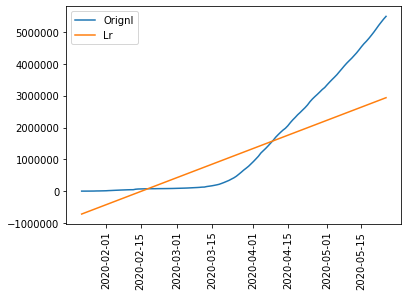

In [29]:
plt.plot(datewise.index,datewise.Confirmed,label='Orignl')
plt.plot(datewise.index,lr.predict(datewise.days_since.values.reshape(-1,1)),label='Lr')
plt.legend()
plt.xticks(rotation=90);

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3) 
train_poly=poly.fit_transform(xtrain)
valid_poly=poly.fit_transform(xtest)
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,ytrain)
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(metrics.mean_squared_error(ytest,prediction_poly))
model_scores.append(rmse_poly)

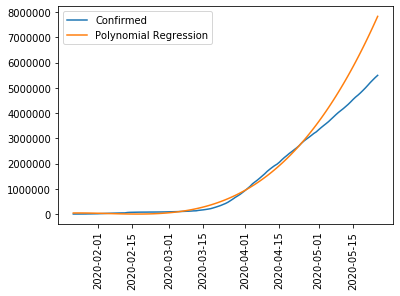

In [31]:
comp_data=poly.transform(np.array(datewise["days_since"]).reshape(-1,1))
ypreds=linreg.predict(comp_data)
plt.plot(datewise.index,datewise.Confirmed,label='Confirmed')
plt.plot(datewise.index,ypreds,label='Polynomial Regression')
plt.legend()
plt.xticks(rotation=90);

In [32]:
metrics.r2_score(datewise.Confirmed.values.reshape(-1,1),ypreds)

0.8760802438802198

In [33]:
from sklearn.svm import SVR

svm=SVR()

svm.fit(xtrain,ytrain)
print(svm.score(xtest,ytest))

-43.36199188836324


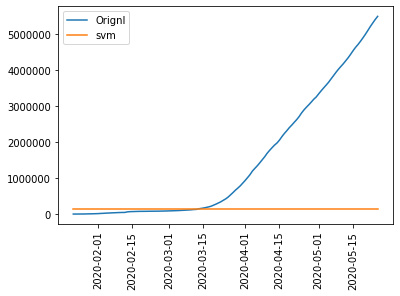

In [34]:
plt.plot(datewise.index,datewise.Confirmed,label='Orignl')
plt.plot(datewise.index,svm.predict(datewise.days_since.values.reshape(-1,1)),label='svm')
plt.legend()
plt.xticks(rotation=90);

In [41]:
%%time
from sklearn.preprocessing import MinMaxScaler,RobustScaler
sc=MinMaxScaler()
rb=RobustScaler()

xtrainrb=rb.fit_transform(xtrain)
xtestrb=rb.transform(xtest)
xtrainsc=sc.fit_transform(xtrain)
xtestsc=sc.transform(xtest)
svm=SVR(kernel='poly',degree=3)
svm.fit(xtrainrb,ytrain)
print(svm.score(xtestrb,ytest))

svm=SVR(kernel='poly',degree=3)
svm.fit(xtrainsc,ytrain)
print(svm.score(xtestsc,ytest))
#Scaling isnt working on this data


svm.fit(xtrain,ytrain)
print(svm.score(xtest,ytest))

-43.360836688432855
-43.36136713691542
0.2477298099721539
Wall time: 12.7 s


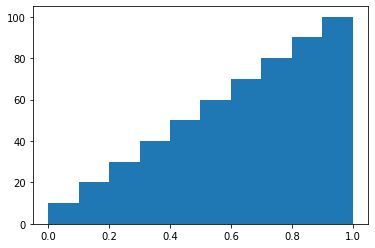

In [53]:
plt.hist(xtrainsc,cumulative=True);

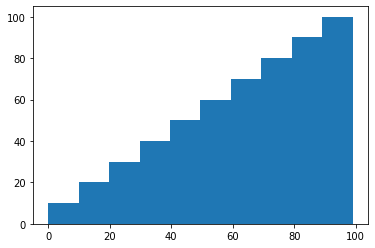

In [55]:
plt.hist(xtrain,cumulative=True);

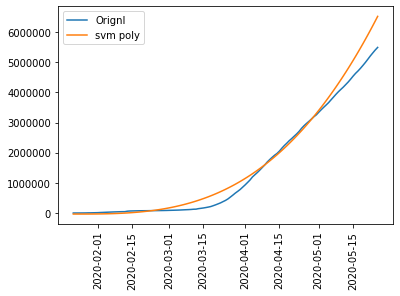

In [43]:
plt.plot(datewise.index,datewise.Confirmed,label='Orignl')
plt.plot(datewise.index,svm.predict(datewise.days_since.values.reshape(-1,1)),label='svm poly')
plt.legend()
plt.xticks(rotation=90);

## Time Series Forecasting

In [57]:
from prophet import Prophet
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(datewise.index),list(datewise["Confirmed"])),columns=['ds','y'])

TypeError: __init__() got an unexpected keyword argument 'interval_width'

In [58]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [60]:
import pystan
model_code = 'parameters {real y;} model {y ~ normal(0,1);}'
model = pystan.StanModel(model_code=model_code)
y = model.sampling().extract()['y']
y.mean()

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5944b02c79788fa0db5b3a93728ca2bf NOW.


DistutilsPlatformError: Unable to find vcvarsall.bat

In [61]:
import fbprophet

ModuleNotFoundError: No module named 'fbprophet'